#  **Reading the Observation File from Observations A, B, and C**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pyvinecopulib as pv
import seaborn as sns
from scipy import stats
# from py_banshee.copula_test import cvm_statistic
# # from scipy.interpolate import interp1d
# # from py_banshee.rankcorr import bn_rankcorr
# # from py_banshee.bn_plot import bn_visualize
# # from py_banshee.d_cal import test_distance
# # from py_banshee.copula_test import cvm_statistic
# # from py_banshee.prediction import inference,conditional_margins_hist

# %matplotlib inline 

In [47]:
filepath = r"../Data/Clean/Obs_WL_All_Points_No_Lag.csv"
data = pd.read_csv(filepath, index_col=None)
data['Datetime'] = pd.to_datetime(data['Datetime'])
data = data[(data['Datetime'] >= '2020-01-01') & (data['Datetime'] < '2022-01-01')]
data.set_index('Datetime', inplace=True)

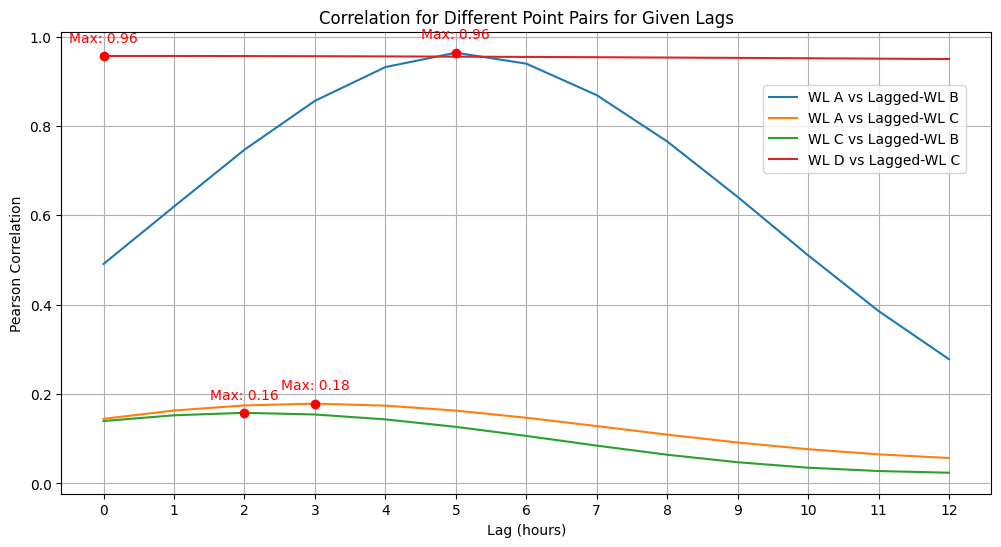

In [62]:
# Define the range of lags (e.g., from 0 to 12 hours)
lags = range(0, 13)  # Lag in hours

# Define the point pairs for comparison
point_pairs = [
    ('WL A', 'WL B'),
    ('WL A', 'WL C'),
    ('WL C', 'WL B'),
    ('WL D', 'WL C')
]

# Dictionary to store results for all point pairs
results = {}

# Loop through each point pair
for point1, point2 in point_pairs:
    correlations = []  # List to store correlation results for the current pair
    
    # Loop through each lag value and calculate correlation
    for lag in lags:
        # Step 1: Shift the second point by the current lag
        data_lagged = data.copy()
        data_lagged.index = data_lagged.index + pd.Timedelta(hours=lag)  # Apply the lag

        # Step 2: Merge the two points on 'Datetime' index
        comparison = pd.merge(
            data[point1],  # First point column from the original data
            data_lagged[point2],  # Second point column from lagged data
            left_index=True,  # Merge based on the Datetime index
            right_index=True,
            how='inner'  # Use inner join to only merge matching Datetime values
        )

        # Step 3: Calculate correlation between the two points
        corr = comparison[point1].corr(comparison[point2])
        correlations.append(corr)

    # Store the correlation results for the current pair
    results[f'{point1} vs Lagged-{point2}'] = correlations

# Plot the results for each point pair
plt.figure(figsize=(12, 6))
for pair, correlations in results.items():
    # Plot the correlation curve
    plt.plot(lags, correlations, label=pair)

    # Highlight the maximum correlation
    max_corr = max(correlations)  # Maximum correlation
    max_lag = lags[correlations.index(max_corr)]  # Lag at which the maximum occurs
    plt.annotate(
        f'Max: {max_corr:.2f}',  # Annotation text
        (max_lag, max_corr),  # Coordinates to place the annotation
        textcoords="offset points",
        xytext=(0, 10),  # Offset text slightly above the point
        ha='center',
        fontsize=10,
        color='red'
    )
    plt.scatter(max_lag, max_corr, color='red', zorder=5)  # Highlight the max point

plt.title('Correlation for Different Point Pairs for Given Lags')
plt.xlabel('Lag (hours)')
plt.ylabel('Pearson Correlation')
plt.grid(True)
plt.xticks(range(0, 13))  # Set x-ticks for each hour
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 0.9))  # Add a legend to distinguish point pairs
plt.show()
